<a href="https://colab.research.google.com/github/LilasCorner/jlootbox-data/blob/main/JLootBoxData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sns

In [69]:
#creating and joining dataframes 

paramsdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/CombinedParams.csv",skip_blank_lines=True)
moneydf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/moneyCombined.csv",skip_blank_lines=True)
freqdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/purchaseCombined.csv",skip_blank_lines=True)
thresdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/thresholdCombined.csv",skip_blank_lines=True)

mergedmoney = pd.merge(moneydf, paramsdf, how='outer', left_on="run", right_on="run")
mergedfreq = pd.merge(freqdf, paramsdf, how='outer', left_on="run", right_on="run")
mergedthres = pd.merge(thresdf, paramsdf, how='outer', left_on="run", right_on="run")

mergedmoney.dropna()
mergedfreq.dropna()
mergedthres.dropna()

,run,getThreshold,tick,randomSeed,stopTime,manip,numPlayers,strat,network
0,12.0,5.0,1.0,25869613.0,500.0,NONE,169.0,PRICE,LATTICE
1,12.0,5.0,1.0,29083638.0,500.0,NONE,200.0,PRICE,RANDOM
2,12.0,5.0,1.0,25869613.0,500.0,NONE,169.0,LATTICE,PRICE
3,12.0,5.0,1.0,29083638.0,500.0,NONE,200.0,PRICE,RANDOM
4,12.0,5.0,1.0,25869613.0,500.0,NONE,169.0,PRICE,LATTICE
...,...,...,...,...,...,...,...,...,...
344529,298.0,10.0,8.0,29217489.0,500.0,LIM_ED,1000.0,COIN_FLIP,RANDOM
344530,298.0,10.0,8.0,29217489.0,500.0,LIM_ED,1000.0,COIN_FLIP,RANDOM
344531,298.0,10.0,9.0,29217489.0,500.0,LIM_ED,1000.0,COIN_FLIP,RANDOM
344532,298.0,10.0,9.0,29217489.0,500.0,LIM_ED,1000.0,COIN_FLIP,RANDOM


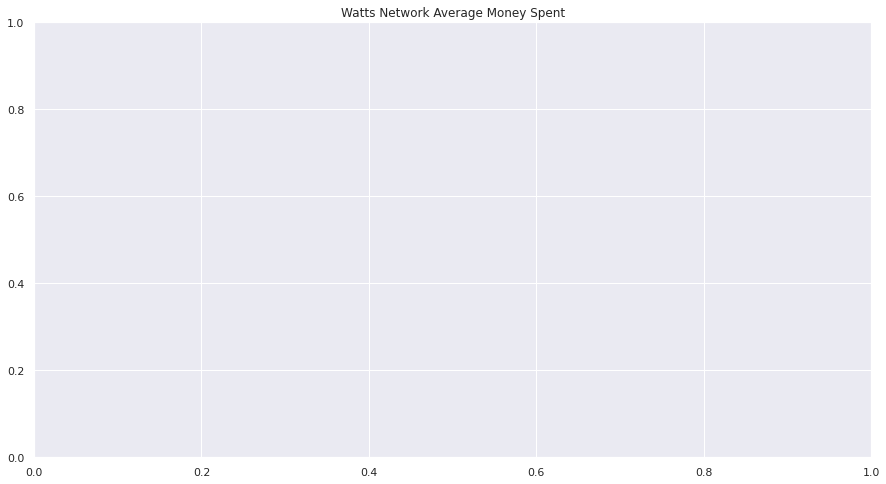

In [40]:
#WATTS

plt.title('Watts Network Average Money Spent')
sns.set(rc = {'figure.figsize':(15,8)})
# sns.lineplot(x=time_df['tick'], y=time_df['Coin Price'], hue=time_df['run'])

In [ ]:
#WATTS

plt.title('Watts Network Average Purchase Frequency')

In [ ]:
#WATTS

plt.title('Watts Network Average Buy Threshold')

In [ ]:
#RANDOM

plt.title('Random Density Network Average Money Spent')


In [ ]:
#RANDOM

plt.title('Random Density Network Average Purchase Frequency')

In [ ]:
#RANDOM

plt.title('Random Density Network Average Buy Threshold')